<a href="https://colab.research.google.com/github/Adh101/TechAxis-Data-Science-with-Python-Notes/blob/main/Machine_Learning_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Supervised Learning:

- Supervised learning is the type of machine learning where labelled and predicted values are known.

- Aim: Predict the target values

**Types of Supervised Learning:**



1.   **Regression**
      - Target values: Continuous variables
      - For eg: House Price Value
2.   **Classification**
      - Target Values: Categorical variables
      - For eg: Email Spam/not spam


          Features = Predictors = Independent

          Target = Responses = Dependent

Requirements for Supervised Learning:
  - No missing values,
  - Data in numeric format,
  - Pandas Dataframe or numpy array,





       ** Important Steps while building the model:**
        1. Perform EDA first on the data.
        2. Import Model
        3. Create Model
        4. Fit Model
        5. Use Model for Prediction

#### Importing Libraries and Loading Data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#load the data
df = pd.read_csv("data.csv")

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


####Data Preparation

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
list(df.dtypes[df.dtypes == 'object'].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ','_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### Exploratory Data Analysis

In [10]:
df.shape

(11914, 16)

In [11]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [12]:
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [13]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<Axes: xlabel='msrp', ylabel='Count'>

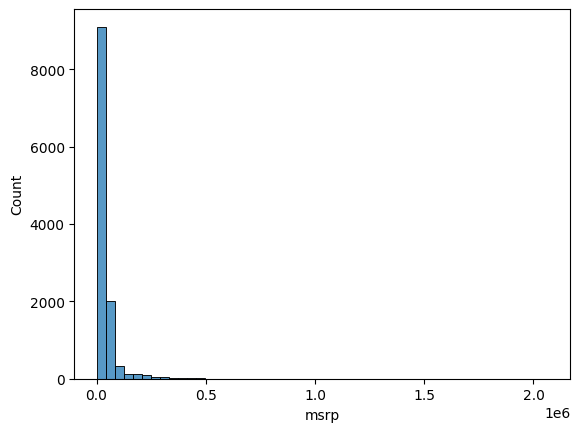

In [15]:
#visualize the distribution of price
sns.histplot(df.msrp, bins = 50)

The above values follows long tail distribution.
Here, 1e6 = 10^6

<Axes: xlabel='msrp', ylabel='Count'>

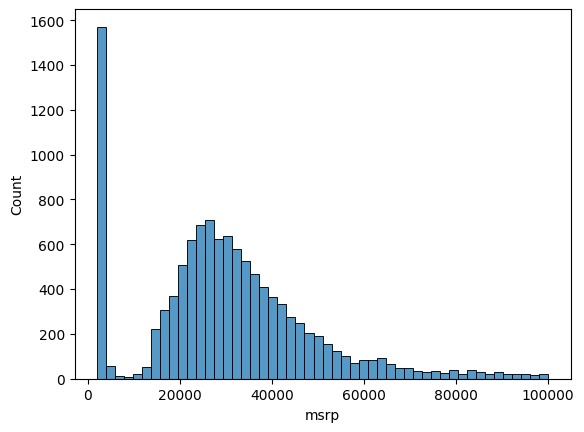

In [16]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

In [17]:
df.msrp

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11914, dtype: int64

In [18]:
np.log1p(df.msrp).max()

14.54107797693027

In [19]:
#apply logarithmic transformation to remove the long tail
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

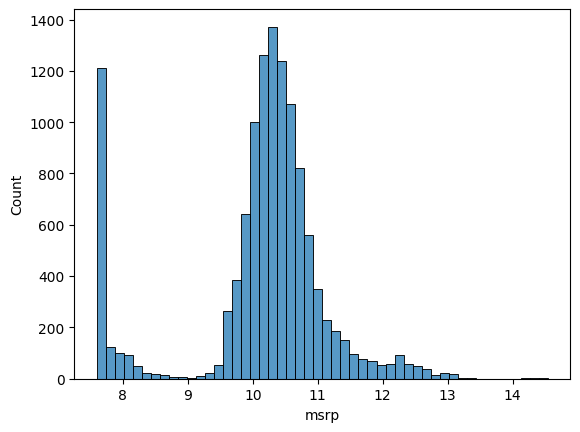

In [20]:
sns.histplot(price_logs, bins = 50)

####Setting up the validation framework

In validation, we split our datasets in three parts, i.e. Training Set, Validation Set and Test Set.

In [21]:
len(df)

11914

In [22]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n -(n_val + n_test)

In [23]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [24]:
#split the data
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [25]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2382,porsche,cayenne,2017,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,159600
2383,porsche,cayenne,2017,premium_unleaded_(required),420.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,24,17,1715,76200
2384,porsche,cayman_s,2006,premium_unleaded_(required),295.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,26,18,1715,58900
2385,porsche,cayman,2014,premium_unleaded_(required),275.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,30,20,1715,52600
2386,porsche,cayman,2014,premium_unleaded_(required),325.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,1715,63800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,ford,flex,2016,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,42600
4760,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32300
4761,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,crossover,large,wagon,23,16,5657,29600
4762,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,34250


In [26]:
np.random.seed(2)
a= np.arange(n)


In [27]:
np.random.shuffle(a)
a


array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [28]:
df.iloc[a]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


Here is a problem with these sets, as data is not shuffled, same kind of data is in the sets which we do not want for our model.

In [29]:
#shuffling and slitting the data
np.random.seed(2)

idx = np.arange(n)

np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

In [30]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [31]:
#reset the index
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [32]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [33]:
np.log1p(df_train.msrp.values)

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [34]:
#apply log transformation
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [35]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [36]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


####Linear Regression

        y = ax + b
        where,
        y = target value,
        x = features,
        a,b = coefficients i.e. slope and intercept

        We need to implement:
        g(X) = y , X is a matrix of features
        g(X) = Xw = y

        To find approx solution:
        XT.Xw = XT.y
        (XT.X)^-1 XT.Xw =  (XT.X)^-1 XT.y
        I.w = (XT.X)^-1 XT.y
        Therefore,
        w = (XT.X)^-1 XT.y

In [37]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0]) #create ones matrix
  X = np.column_stack([ones,X]) #adds the bias term(intercept)

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0],w[1:] #intercept and feature coefficients

####Baseline Model

In [38]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [39]:
#create the matrix of features
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [40]:
#prepare data

def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [41]:
X_train = prepare_X(df_train)

In [42]:
w0,w = train_linear_regression(X_train,y_train)

In [43]:
y_pred = w0 + X_train.dot(w)

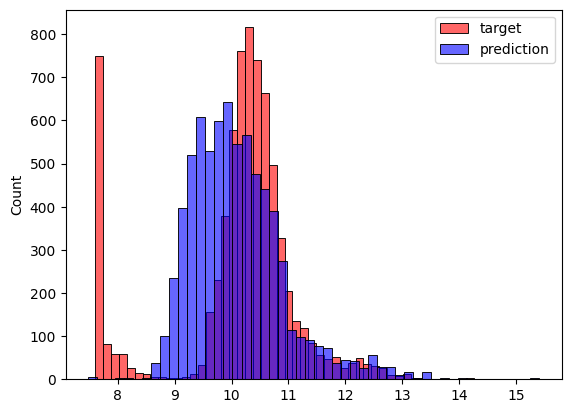

In [44]:
sns.histplot(y_train, label ='target',bins =50,color ='red',alpha = 0.6)
sns.histplot(y_pred, label ='prediction',bins =50,color ='blue', alpha = 0.6)

plt.legend()
plt.show()


####RMSE(Root Mean Squared Error)

MSE = (y_pred - y)**2.mean( )

RMSE = sqrt(MSE)

In [45]:
def rmse(y,y_pred):
  error = y_pred - y
  mse = (error**2).mean()
  rmse = np.sqrt(mse)
  return rmse

In [46]:
rmse(y_train,y_pred)

0.7554192603920132

####Validating the model

In [47]:
X_val = prepare_X(df_val)

w0,w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_val.dot(w)

In [48]:
rmse(y_val,y_pred)

0.761653099130156

####Feature Engineering

In [49]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [50]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [51]:
#lets use year column in our base model

def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features.append('age')

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X


In [52]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)
print('train:',rmse(y_train,y_pred))

X_val = prepare_X(df_val)
w0,w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_val.dot(w)
print('validation:',rmse(y_val,y_pred))



train: 0.5175055465840046
validation: 0.5172055461058299


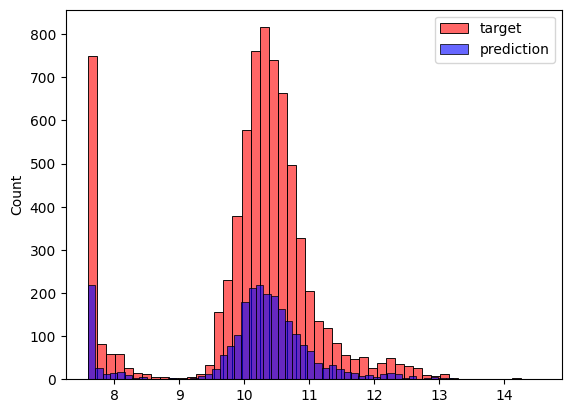

In [53]:
sns.histplot(y_train, label ='target',bins =50,color ='red',alpha = 0.6)
sns.histplot(y_val, label ='prediction',bins =50,color ='blue', alpha = 0.6)

plt.legend()
plt.show()

#### Categorical Variables

In [54]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [55]:
#check on column number_of_doors
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [56]:
#using it as a categorical values
(df_train.number_of_doors ==4).astype(int)
(df_train.number_of_doors ==2).astype(int)
(df_train.number_of_doors ==3).astype(int)

0       0
1       0
2       0
3       1
4       0
       ..
7145    0
7146    0
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [57]:
for v in [2,3,4]:
  df['num_doors_%s' % v] = (df.number_of_doors == v).astype(int)

In [58]:
#use it in base model
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features.append('age')

  for v in [2,3,4]:
    feature = 'num_doors_%s' % v
    df[feature] = (df.number_of_doors == v).astype(int)
    features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [59]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)
print('train:',rmse(y_train,y_pred))

X_val = prepare_X(df_val)
w0,w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_val.dot(w)
print('validation:',rmse(y_val,y_pred))

train: 0.5150615580371418
validation: 0.5157995641501678


In [60]:
df_train.make.value_counts()

chevrolet        667
ford             519
volkswagen       489
toyota           452
dodge            367
nissan           328
gmc              313
mazda            263
cadillac         249
honda            247
suzuki           210
mercedes-benz    208
bmw              202
infiniti         195
audi             192
hyundai          177
volvo            165
acura            155
subaru           154
kia              135
lexus            134
pontiac          125
mitsubishi       122
buick            121
chrysler         120
oldsmobile       102
land_rover        89
porsche           85
lincoln           82
saab              72
aston_martin      58
plymouth          48
bentley           45
ferrari           43
fiat              40
maserati          38
scion             36
lamborghini       31
lotus             16
rolls-royce       13
tesla             13
maybach           11
hummer             9
genesis            3
spyker             3
bugatti            2
mclaren            1
alfa_romeo   

In [61]:
df_train.engine_fuel_type.value_counts()

regular_unleaded                                4318
premium_unleaded_(required)                     1187
premium_unleaded_(recommended)                   921
flex-fuel_(unleaded/e85)                         531
diesel                                            94
electric                                          41
flex-fuel_(premium_unleaded_required/e85)         38
flex-fuel_(premium_unleaded_recommended/e85)      16
flex-fuel_(unleaded/natural_gas)                   3
Name: engine_fuel_type, dtype: int64

In [62]:
df_train.transmission_type.value_counts()

automatic           4921
manual              1789
automated_manual     383
direct_drive          42
unknown               15
Name: transmission_type, dtype: int64

In [63]:
df_train.driven_wheels.value_counts()

front_wheel_drive    2883
rear_wheel_drive     2025
all_wheel_drive      1381
four_wheel_drive      861
Name: driven_wheels, dtype: int64

In [64]:
df_train.market_category.value_counts()

crossover                                   647
flex_fuel                                   520
luxury                                      512
hatchback                                   395
luxury,performance                          391
                                           ... 
performance,hybrid                            1
crossover,exotic,luxury,performance           1
crossover,exotic,luxury,high-performance      1
flex_fuel,hybrid                              1
factory_tuner,luxury                          1
Name: market_category, Length: 69, dtype: int64

In [65]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2017 - df.year
  features.append('age')

  for v in [2,3,4]:
    feature = 'num_doors_%s' % v
    df[feature] = (df.number_of_doors == v).astype(int)
    features.append(feature)

  for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
      feature = 'is_make_%s' % v
      df[feature] = (df['make'] == v).astype(int)
      features.append(feature)

  for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
      feature = 'is_type_%s' % v
      df[feature] = (df['engine_fuel_type'] == v).astype(int)
      features.append(feature)

  for v in ['automatic', 'manual', 'automated_manual']:
      feature = 'is_transmission_%s' % v
      df[feature] = (df['transmission_type'] == v).astype(int)
      features.append(feature)

  for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
      feature = 'is_driven_wheens_%s' % v
      df[feature] = (df['driven_wheels'] == v).astype(int)
      features.append(feature)

  for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
      feature = 'is_mc_%s' % v
      df[feature] = (df['market_category'] == v).astype(int)
      features.append(feature)

  for v in ['compact', 'midsize', 'large']:
      feature = 'is_size_%s' % v
      df[feature] = (df['vehicle_size'] == v).astype(int)
      features.append(feature)

  for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
      feature = 'is_style_%s' % v
      df[feature] = (df['vehicle_style'] == v).astype(int)
      features.append(feature)

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [66]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 113.20645472118994
validation: 55.22691647401435


In [67]:
w0

8115744691019874.0

RMSE values are too high, so we can say that something went wrong with our model.

#### Regularization

In [69]:
A = [
    [1,2,2],
    [2,1,1],
    [2,1,1]
]

In [71]:
AT=np.array(A)

In [72]:
np.linalg.inv(AT)

LinAlgError: ignored

In [73]:
A = [
    [1,2,2],
    [2,1,1.00001],
    [2,1.00001,1]
]

In [74]:
AT=np.array(A)

In [75]:
np.linalg.inv(AT)

array([[-3.33335556e-01,  3.33333889e-01,  3.33333889e-01],
       [ 3.33333889e-01, -5.00000833e+04,  4.99999167e+04],
       [ 3.33333889e-01,  4.99999167e+04, -5.00000833e+04]])

Large negative values, to solve this we need to reularize by adding the values in diagonal values.

In [77]:
A = [
    [1.01,2,2],
    [2,1.01,1.00001],
    [2,1.00001,1.01]
]
AT=np.array(A)
np.linalg.inv(AT)

array([[ -0.3366913 ,   0.33501455,   0.33501455],
       [  0.33501455,  49.96545888, -50.13464122],
       [  0.33501455, -50.13464122,  49.96545888]])

In [78]:
A = [
    [1,2,2],
    [2,1,1.00001],
    [2,1.00001,1]
]
AT=np.array(A)
np.linalg.inv(AT)

array([[-3.33335556e-01,  3.33333889e-01,  3.33333889e-01],
       [ 3.33333889e-01, -5.00000833e+04,  4.99999167e+04],
       [ 3.33333889e-01,  4.99999167e+04, -5.00000833e+04]])

In [80]:
AT = AT + 0.01 * np.eye(3)
np.linalg.inv(AT)

array([[-0.37293238,  0.35348874,  0.35348874],
       [ 0.35348874,  4.44777468, -4.64396093],
       [ 0.35348874, -4.64396093,  4.44777468]])

In [81]:
#implementing in our model
def train_linear_regression_reg(X,y,r=0.01):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0],w[1:]

In [83]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.01)

y_pred = w0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.464312489456461
validation: 0.4602394963124682


#### Tuning the model
Finding the best value for regularization parameter r.

In [88]:
for r in [0.0,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]:
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train,y_train,r=r)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  print(r , w0,rmse(y_val,y_pred))

0.0 8115744691019874.0 55.22691647401435
1e-06 485.2445594184935 0.4602251277547402
1e-05 7.951493436646225 0.46022535864960845
0.0001 7.258112022332641 0.4602254931319512
0.001 7.1953790893732705 0.4602267628312077
0.01 7.181697276886033 0.4602394963124682
0.1 7.054109288941499 0.4603700695819783
1 6.219919389575025 0.4618298042652329
10 4.3899243405183395 0.4757248100695211


In [89]:
r=0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train,y_train,r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val,y_pred)
score

0.4602267628312077

#### Using the model

In [97]:
#merge train and validation set
df_full_train = pd.concat([df_train,df_val])

In [98]:
df_full_train.reset_index(drop =True)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [100]:
X_full_train = prepare_X(df_full_train)

In [101]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [102]:
y_full_train = np.concatenate([y_train,y_val])

In [103]:
w0, w = train_linear_regression_reg(X_full_train,y_full_train,r=0.001)

In [104]:
#apply model on test data
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

0.45615306144448686

In [105]:
#get car value to predict
car = df_test.iloc[50]
car


make                                     volkswagen
model                                     jetta_gli
year                                           2014
engine_fuel_type     premium_unleaded_(recommended)
engine_hp                                     210.0
engine_cylinders                                4.0
transmission_type                            manual
driven_wheels                     front_wheel_drive
number_of_doors                                 4.0
market_category                         performance
vehicle_size                                midsize
vehicle_style                                 sedan
highway_mpg                                      33
city_mpg                                         23
popularity                                      873
Name: 50, dtype: object

In [106]:
car = car.to_dict()
car

{'make': 'volkswagen',
 'model': 'jetta_gli',
 'year': 2014,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 210.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'sedan',
 'highway_mpg': 33,
 'city_mpg': 23,
 'popularity': 873}

In [107]:
df_car = pd.DataFrame([car])
df_car

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volkswagen,jetta_gli,2014,premium_unleaded_(recommended),210.0,4.0,manual,front_wheel_drive,4.0,performance,midsize,sedan,33,23,873


In [108]:
X_car = prepare_X(df_car)

In [109]:
y_pred = w0 + X_car.dot(w)
y_pred

array([10.06626445])

In [110]:
y_pred = y_pred[0]
y_pred

10.06626444589569

In [112]:
predicted_price = np.expm1(y_pred)
predicted_price

23534.482285584134

In [116]:
#actual price
np.expm1(y_test[50])

29775.00000000001

#### Next Steps:

1. We can use more number of features that what we used in this lesson i.e. 9. Please try.

2. Other Projects:
    - [Student Performnace Dataset](https://archive.ics.uci.edu/dataset/320/student+performance) - predict the student performance
    - California Housing Dataset (inside Sample Data) - predict house prices